In [ ]:
%matplotlib inline


# Decomposition

Example of creating a junction tree from a directed graph.


[('B', 'C', 'E'), ('B', 'E', 'F'), ('B', 'D'), ('A', 'B', 'C'), ('B', 'E'), ('B', 'C'), ('B',)]
[(('B', 'C', 'E'), ('B', 'E')), (('B', 'C', 'E'), ('B', 'C')), (('B', 'C', 'E'), ('B',)), (('B', 'E', 'F'), ('B', 'E')), (('B', 'D'), ('B',)), (('A', 'B', 'C'), ('B', 'C'))]


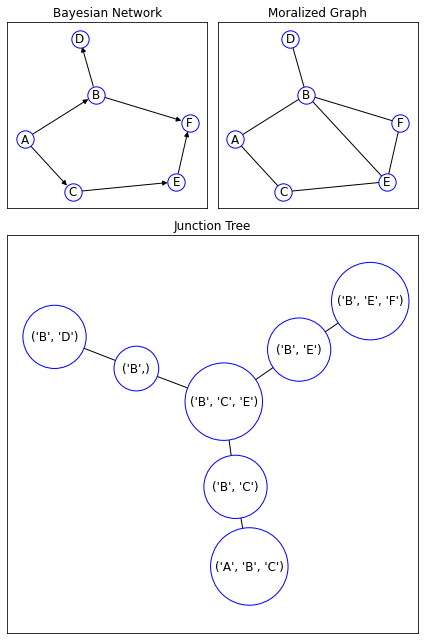

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

B = nx.DiGraph()
B.add_nodes_from(["A", "B", "C", "D", "E", "F"])
B.add_edges_from(
    [("A", "B"), ("A", "C"), ("B", "D"), ("B", "F"), ("C", "E"), ("E", "F")]
)

options = {"with_labels": True, "node_color": "white", "edgecolors": "blue"}

fig = plt.figure(figsize=(6, 9))
axgrid = fig.add_gridspec(3, 2)

ax1 = fig.add_subplot(axgrid[0, 0])
ax1.set_title("Bayesian Network")
pos = nx.nx_agraph.graphviz_layout(B, prog="neato")
nx.draw_networkx(B, pos=pos, **options)

mg = nx.moral_graph(B)
ax2 = fig.add_subplot(axgrid[0, 1], sharex=ax1, sharey=ax1)
ax2.set_title("Moralized Graph")
nx.draw_networkx(mg, pos=pos, **options)

jt = nx.junction_tree(B)
print(jt.nodes())
print(jt.edges())
ax3 = fig.add_subplot(axgrid[1:, :])
ax3.set_title("Junction Tree")
ax3.margins(0.15, 0.25)
nsize = [2000 * len(n) for n in list(jt.nodes())]
pos = nx.nx_agraph.graphviz_layout(jt, prog="neato")
nx.draw_networkx(jt, pos=pos, node_size=nsize, **options)

plt.tight_layout()
plt.show()